In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Step 1: EDA

In [5]:

index_names = ['unit_number', 'time_cycles']
setting_names = ['opp_set_1', 'opp_set_2', 'opp_set_3']
sensor_names = ['s_m{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names


In [6]:


train = pd.read_csv(r'C:\Users\Rahul Chauhan\Desktop\Rahul Chauhan\Machine Learning\Dataset\CMaps\train_FD001.txt', sep=' ', index_col=False, header=None, names=col_names)
valid = pd.read_csv(r'C:\Users\Rahul Chauhan\Desktop\Rahul Chauhan\Machine Learning\Dataset\CMaps\test_FD001.txt',sep=' ',index_col=False,header= None,names=col_names)
y_rul = pd.read_csv(r'C:\Users\Rahul Chauhan\Desktop\Rahul Chauhan\Machine Learning\Dataset\CMaps\RUL_FD001.txt',sep=' ',index_col=False,header= None,names=['RUL'])

C:\Users\Rahul Chauhan\AppData\Local\Temp\ipykernel_10928\4089741752.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train = pd.read_csv(r'C:\Users\Rahul Chauhan\Desktop\Rahul Chauhan\Machine Learning\Dataset\CMaps\train_FD001.txt', sep=' ', index_col=False, header=None, names=col_names)
C:\Users\Rahul Chauhan\AppData\Local\Temp\ipykernel_10928\4089741752.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  valid = pd.read_csv(r'C:\Users\Rahul Chauhan\Desktop\Rahul Chauhan\Machine Learning\Dataset\CMaps\test_FD001.txt',sep=' ',index_col=False,header= None,names=col_names)


In [7]:
train.isnull().sum()

unit_number    0
time_cycles    0
opp_set_1      0
opp_set_2      0
opp_set_3      0
s_m1           0
s_m2           0
s_m3           0
s_m4           0
s_m5           0
s_m6           0
s_m7           0
s_m8           0
s_m9           0
s_m10          0
s_m11          0
s_m12          0
s_m13          0
s_m14          0
s_m15          0
s_m16          0
s_m17          0
s_m18          0
s_m19          0
s_m20          0
s_m21          0
dtype: int64

In [8]:
valid.isnull().sum()

unit_number    0
time_cycles    0
opp_set_1      0
opp_set_2      0
opp_set_3      0
s_m1           0
s_m2           0
s_m3           0
s_m4           0
s_m5           0
s_m6           0
s_m7           0
s_m8           0
s_m9           0
s_m10          0
s_m11          0
s_m12          0
s_m13          0
s_m14          0
s_m15          0
s_m16          0
s_m17          0
s_m18          0
s_m19          0
s_m20          0
s_m21          0
dtype: int64

In [9]:
train.head()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m12,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
def ruladd(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_cycles.to_frame(name='max_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_cycle"] - merged['time_cycles']
    merged = merged.drop("max_cycle", axis=1) 
    return merged   

In [11]:
train = ruladd(train)

In [12]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


array([[<Axes: title={'center': 'unit_number'}>,
        <Axes: title={'center': 'time_cycles'}>,
        <Axes: title={'center': 'opp_set_1'}>,
        <Axes: title={'center': 'opp_set_2'}>,
        <Axes: title={'center': 'opp_set_3'}>],
       [<Axes: title={'center': 's_m1'}>,
        <Axes: title={'center': 's_m2'}>,
        <Axes: title={'center': 's_m3'}>,
        <Axes: title={'center': 's_m4'}>,
        <Axes: title={'center': 's_m5'}>],
       [<Axes: title={'center': 's_m6'}>,
        <Axes: title={'center': 's_m7'}>,
        <Axes: title={'center': 's_m8'}>,
        <Axes: title={'center': 's_m9'}>,
        <Axes: title={'center': 's_m10'}>],
       [<Axes: title={'center': 's_m11'}>,
        <Axes: title={'center': 's_m12'}>,
        <Axes: title={'center': 's_m13'}>,
        <Axes: title={'center': 's_m14'}>,
        <Axes: title={'center': 's_m15'}>],
       [<Axes: title={'center': 's_m16'}>,
        <Axes: title={'center': 's_m17'}>,
        <Axes: title={'center': 's_

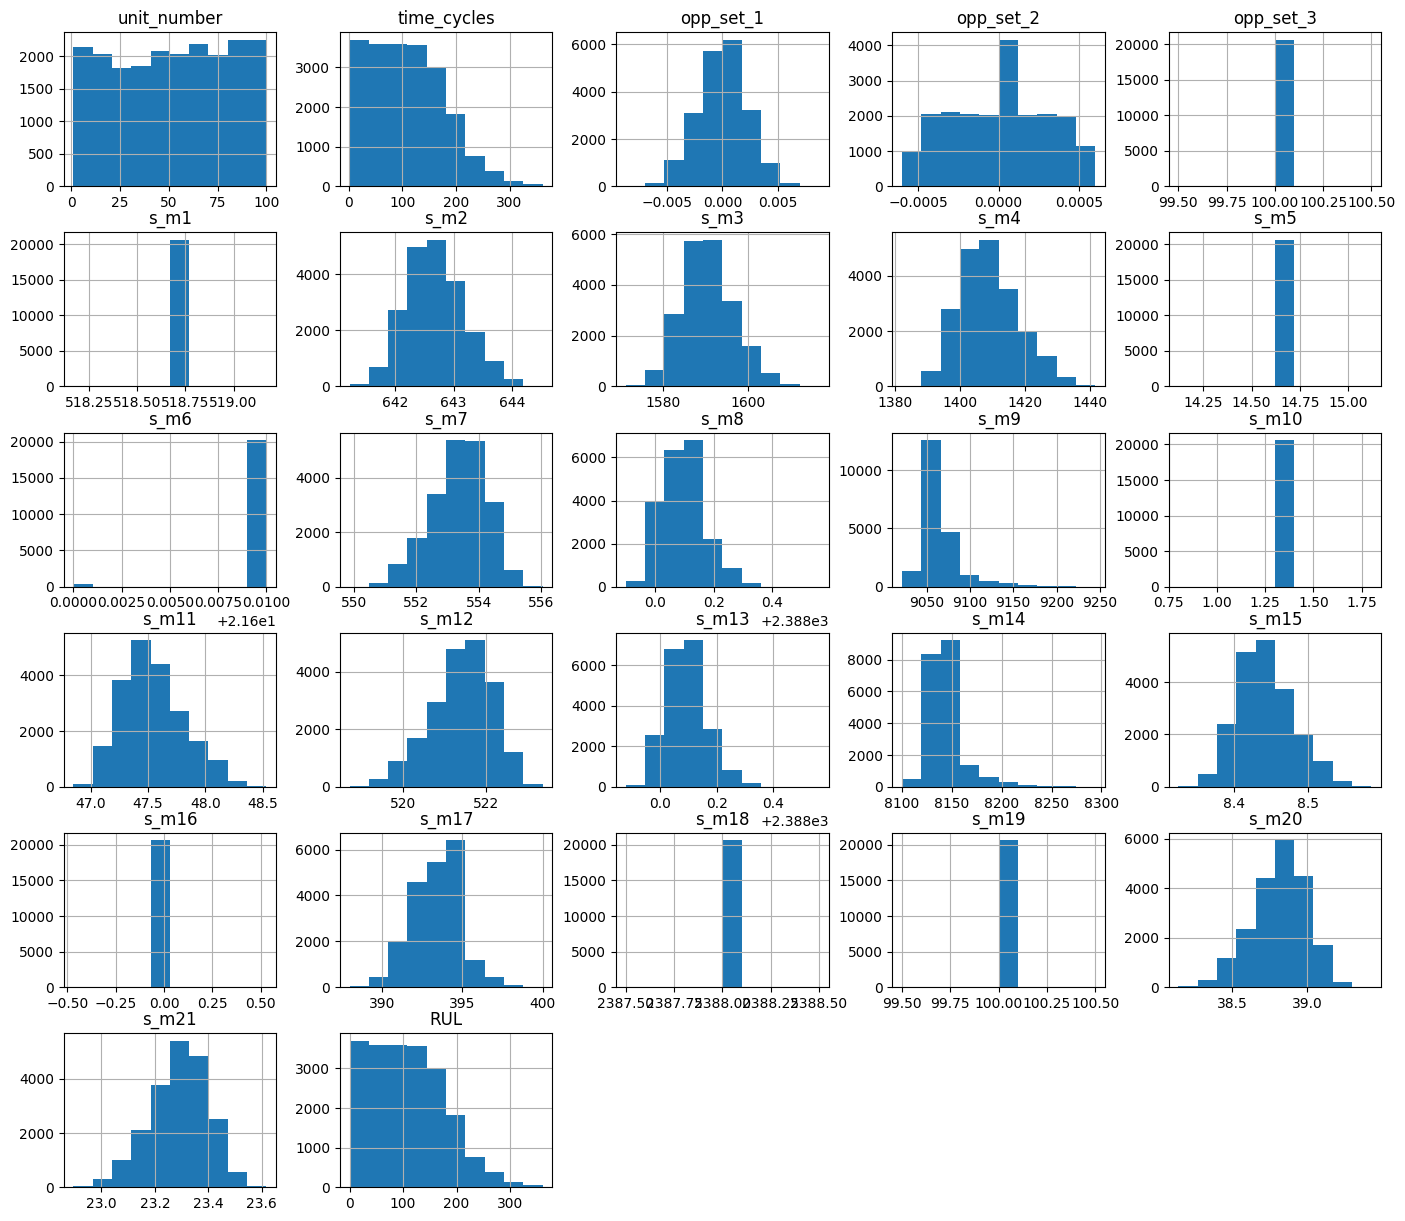

In [13]:
train.hist(figsize=(17, 15))


In [14]:
val_data = valid.groupby('unit_number').max().reset_index()

In [15]:
data = train.groupby('unit_number').max().reset_index()

In [16]:
data.head()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


In [17]:
val_data.head()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m12,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21
0,1,31,0.0047,0.0005,100.0,518.67,643.02,1594.29,1412.28,14.62,...,522.39,2388.12,8139.62,8.4577,0.03,393,2388,100.0,39.11,23.4572
1,2,49,0.0039,0.0005,100.0,518.67,643.33,1599.04,1416.93,14.62,...,522.23,2388.16,8137.07,8.4992,0.03,395,2388,100.0,39.03,23.5222
2,3,126,0.0076,0.0005,100.0,518.67,643.44,1600.07,1419.21,14.62,...,522.20,2388.21,8137.46,8.5043,0.03,396,2388,100.0,39.07,23.4232
3,4,106,0.0051,0.0005,100.0,518.67,643.48,1599.90,1418.38,14.62,...,522.37,2388.19,8139.14,8.4910,0.03,395,2388,100.0,39.06,23.4121
4,5,98,0.0062,0.0005,100.0,518.67,643.35,1598.76,1419.36,14.62,...,522.20,2388.19,8140.87,8.4885,0.03,395,2388,100.0,39.04,23.4622


In [18]:
val_data.corr()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m12,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21
unit_number,1.000000,0.088814,0.075876,0.018450,NaN,NaN,0.134117,0.127373,0.039349,NaN,...,0.024349,0.007607,0.119130,0.050438,NaN,0.114991,NaN,NaN,0.082192,0.077235
time_cycles,0.088814,1.000000,0.322427,-0.022386,NaN,NaN,0.578934,0.587612,0.562882,NaN,...,0.248692,0.374363,0.404426,0.532273,NaN,0.563895,NaN,NaN,0.257797,0.201504
opp_set_1,0.075876,0.322427,1.000000,-0.184597,NaN,NaN,0.155854,0.101718,0.155381,NaN,...,0.186289,0.109419,0.173322,0.137847,NaN,0.074489,NaN,NaN,0.181021,0.133714
opp_set_2,0.018450,-0.022386,-0.184597,1.000000,NaN,NaN,-0.152033,-0.175265,-0.113222,NaN,...,0.200100,-0.132248,0.043073,-0.182719,NaN,-0.073026,NaN,NaN,0.027085,0.068389
opp_set_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_m1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_m2,0.134117,0.578934,0.155854,-0.152033,NaN,NaN,1.000000,0.816152,0.861337,NaN,...,-0.268206,0.776908,0.099175,0.843975,NaN,0.805963,NaN,NaN,-0.240109,-0.215279
s_m3,0.127373,0.587612,0.101718,-0.175265,NaN,NaN,0.816152,1.000000,0.814305,NaN,...,-0.229597,0.683273,0.227937,0.811863,NaN,0.796619,NaN,NaN,-0.224925,-0.159448
s_m4,0.039349,0.562882,0.155381,-0.113222,NaN,NaN,0.861337,0.814305,1.000000,NaN,...,-0.299809,0.815454,0.123424,0.885201,NaN,0.844717,NaN,NaN,-0.206919,-0.220431
s_m5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.corr()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21,RUL
unit_number,1.000000,0.156019,-0.025207,-0.005296,NaN,NaN,0.062354,0.023819,0.091887,NaN,...,-0.051846,-0.127037,0.182472,NaN,-0.140427,NaN,NaN,-0.024282,0.051011,0.156019
time_cycles,0.156019,1.000000,0.008701,0.111535,NaN,NaN,0.134242,0.147159,0.089102,NaN,...,-0.110598,0.110148,0.107887,NaN,0.056383,NaN,NaN,0.156311,0.228463,1.000000
opp_set_1,-0.025207,0.008701,1.000000,-0.033631,NaN,NaN,0.041115,0.091879,0.076145,NaN,...,-0.073293,0.043845,0.080337,NaN,-0.260696,NaN,NaN,-0.108429,-0.079021,0.008701
opp_set_2,-0.005296,0.111535,-0.033631,1.000000,NaN,NaN,-0.037437,0.191406,-0.009030,NaN,...,0.033337,0.030537,0.015501,NaN,0.019548,NaN,NaN,-0.137437,-0.146059,0.111535
opp_set_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_m1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_m2,0.062354,0.134242,0.041115,-0.037437,NaN,NaN,1.000000,0.105934,0.202048,NaN,...,0.022347,-0.056058,-0.066819,NaN,-0.162463,NaN,NaN,0.019701,-0.042187,0.134242
s_m3,0.023819,0.147159,0.091879,0.191406,NaN,NaN,0.105934,1.000000,-0.100831,NaN,...,-0.177793,0.325523,0.052721,NaN,0.163175,NaN,NaN,-0.056135,-0.101281,0.147159
s_m4,0.091887,0.089102,0.076145,-0.009030,NaN,NaN,0.202048,-0.100831,1.000000,NaN,...,-0.056543,-0.034570,-0.027388,NaN,-0.144073,NaN,NaN,-0.069781,-0.039933,0.089102
s_m5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

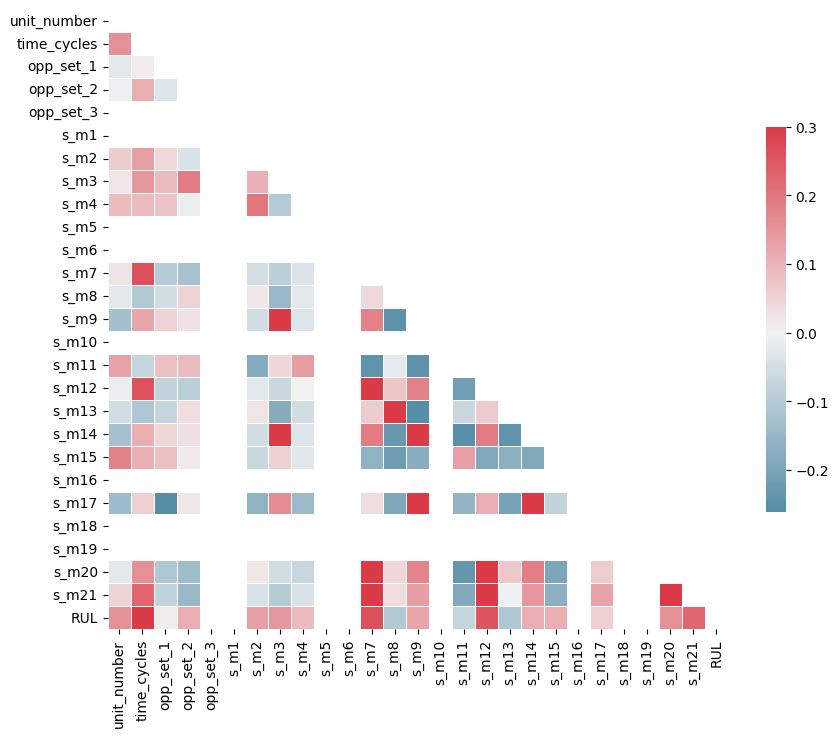

In [20]:

# Compute the correlation matrix
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Step 2: Preprocessing

In [21]:
columns_to_drop = ['opp_set_3', 's_m1', 's_m5', 's_m6', 's_m10', 's_m16', 's_m18', 's_m19'] 

In [22]:
data.head()

,unit_number,time_cycles,opp_set_1,opp_set_2,opp_set_3,s_m1,s_m2,s_m3,s_m4,s_m5,...,s_m13,s_m14,s_m15,s_m16,s_m17,s_m18,s_m19,s_m20,s_m21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


In [23]:
data.shape

(100, 27)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
data= train.drop(columns=columns_to_drop).copy()

In [26]:
x = data.drop('RUL',axis = 1)

In [27]:
y = data['RUL']

In [28]:

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [29]:
sc = MinMaxScaler()

In [30]:
sc.fit(x_train)

MinMaxScaler()

In [31]:
x_train_sc = sc.transform(x_train)

In [32]:
sc.fit(x_test)

MinMaxScaler()

In [33]:
x_test_sc = sc.transform(x_test)

In [34]:
x_valid = valid.groupby('unit_number').last().reset_index().drop(columns=columns_to_drop)

In [35]:
x_valid.shape

(100, 18)

In [36]:
sc.fit(x_valid)

MinMaxScaler()

In [37]:
x_vald_sc = sc.transform(x_valid)

<Axes: >

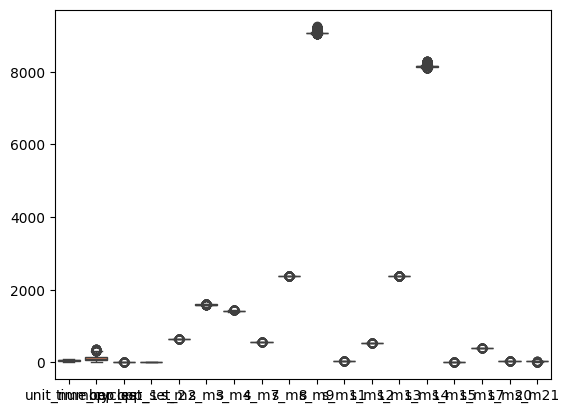

In [38]:
sns.boxplot(x_train)

<Axes: >

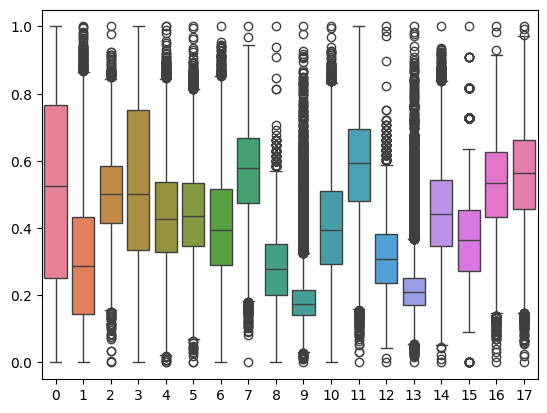

In [39]:
sns.boxplot(x_train_sc)

Step 4: Model Formulation

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [74]:
le = LinearRegression()
RE = RandomForestRegressor()
svr = SVR(kernel= 'rbf')
clfs = {
    'Linear Regressor':le,
    'Random Forest' : RE,
    'Support Vector Machine': svr
}

Step 5 : Model Evaluation

In [77]:
def classify(xlf,x_train_sc,y_train,x_test_sc,y_test):
    clf.fit(x_train_sc,y_train)
    y_pred_train = clf.predict(x_train_sc)
    y_pred_test = clf.predict(x_test_sc)
    y_pred = clf.predict(x_vald_sc)
    r2_train = r2_score(y_pred_train,y_train)
    r2_test = r2_score(y_pred_test,y_test)
    r2 = r2_score(y_pred,y_rul)
    ms = mean_squared_error(y_pred,y_rul)
    rs = np.sqrt(ms)
    ms_train = mean_squared_error(y_pred_train,y_train)
    rs_train = np.sqrt(ms_train)
    ms_test = mean_squared_error(y_pred_test,y_test)
    rs_test = np.sqrt(ms_test)
    return r2,r2_test,r2_train,rs,rs_test,rs_train

In [87]:

print("{:<25} {:<25} {:<25} {:<25} {:<25} {:<25} {:<25}".format(
    "Regressor", "r2_score for Train data ", "r2_score for Test data", "r2_score for RUL Values", "RMSE Train", "RMSE Predicted RUL", "RMSE Test"))

for name, clf in clfs.items():
    r2, r2_train, r2_test, rs, rmse_train, rmse_test = classify(clf, x_train_sc, y_train, x_test_sc, y_test)
    print("{:<25} {:<25.2f} {:<25.2f} {:<25.2f} {:<25.2f} {:<25.2f} {:<25.2f}".format(
        name, r2_train, r2_test, r2, rmse_train, rs, rmse_test))


Regressor                 r2_score for Train data   r2_score for Test data    r2_score for RUL Values   RMSE Train                RMSE Predicted RUL        RMSE Test                
Linear Regressor          0.54                      0.51                      0.63                      40.35                     42.05                     39.84                    
Random Forest             0.89                      0.99                      0.57                      21.55                     42.83                     6.47                     
Support Vector Machine    0.34                      0.49                      0.62                      40.73                     26.54                     37.61                    


C:\Users\Rahul Chauhan\AppData\Local\Temp\ipykernel_10928\1741563324.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regressors, y=train_r2, palette='coolwarm')
C:\Users\Rahul Chauhan\AppData\Local\Temp\ipykernel_10928\1741563324.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regressors, y=test_r2, palette='coolwarm')
C:\Users\Rahul Chauhan\AppData\Local\Temp\ipykernel_10928\1741563324.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regressors, y=rul_r2, palette='coolwarm')
C:\Users\Rahul Chauhan\AppData\Local\Temp\ipyk

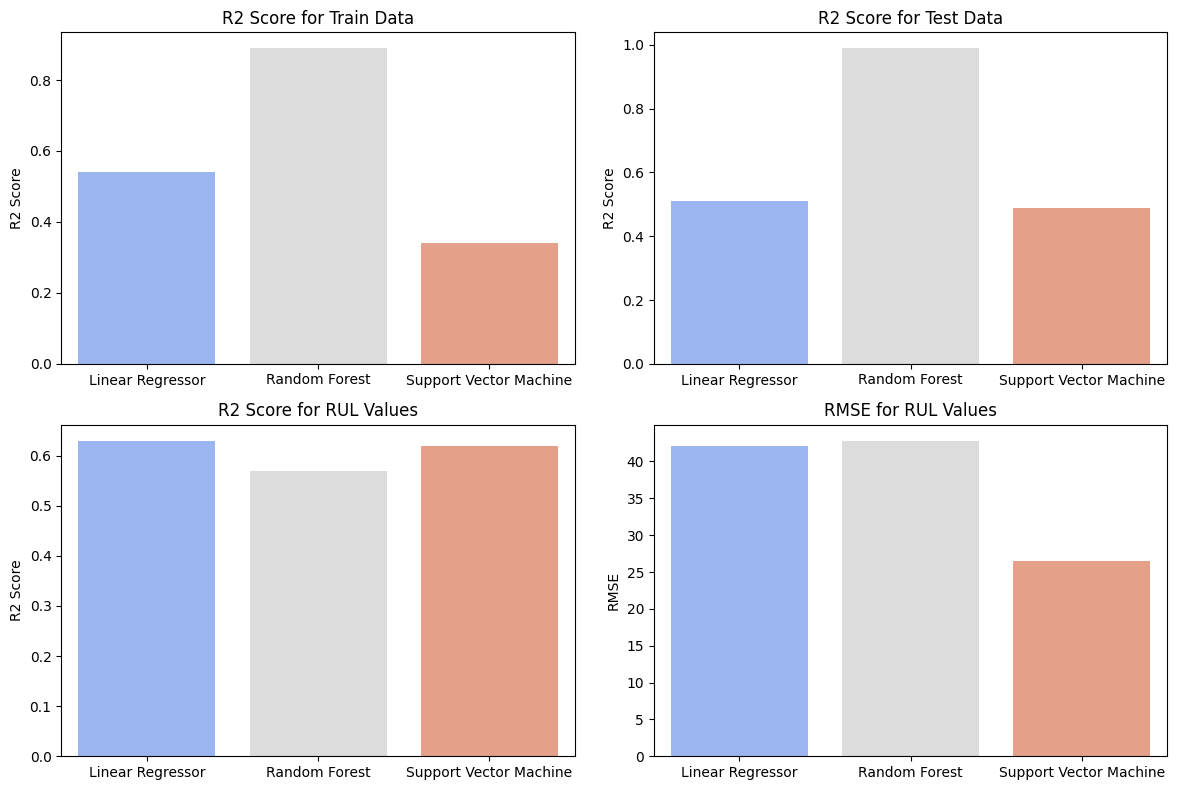

In [89]:
regressors = ['Linear Regressor', 'Random Forest', 'Support Vector Machine']
train_r2 = [0.54, 0.89, 0.34]
test_r2 = [0.51, 0.99, 0.49]
rul_r2 = [0.63, 0.57, 0.62]
train_rmse = [40.35, 21.55, 40.73]
predicted_rul_rmse = [42.05, 42.83, 26.54]
test_rmse = [39.84, 6.47, 37.61]

# Plotting
plt.figure(figsize=(12, 8))

# R2 Scores
plt.subplot(2, 2, 1)
sns.barplot(x=regressors, y=train_r2, palette='coolwarm')
plt.title('R2 Score for Train Data')
plt.ylabel('R2 Score')

plt.subplot(2, 2, 2)
sns.barplot(x=regressors, y=test_r2, palette='coolwarm')
plt.title('R2 Score for Test Data')
plt.ylabel('R2 Score')

plt.subplot(2, 2, 3)
sns.barplot(x=regressors, y=rul_r2, palette='coolwarm')
plt.title('R2 Score for RUL Values')
plt.ylabel('R2 Score')

# RMSE
plt.subplot(2, 2, 4)
sns.barplot(x=regressors, y=predicted_rul_rmse, palette='coolwarm')
plt.title('RMSE for RUL Values')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [90]:
RE.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 70],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RE, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_sc, y_train)

C:\Users\Rahul Chauhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
323 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul Chauhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul Chauhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 70]},
             scoring='neg_mean_squared_error')

In [93]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [95]:
Re = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=70)

def eval(x_train_sc, y_train, x_test_sc, y_test, x_vald_sc, y_vald):
    # Fit the model
    Re.fit(x_train_sc, y_train)
    
    # Predictions
    y_pred_train = Re.predict(x_train_sc)
    y_pred_test = Re.predict(x_test_sc)
    y_pred_vald = Re.predict(x_vald_sc)
    
    # R2 scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    r2_vald = r2_score(y_vald, y_pred_vald)
    
    # RMSE
    rs_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rs_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rs_vald = np.sqrt(mean_squared_error(y_vald, y_pred_vald))
    
    return {'Train': {'R2 Score': r2_train, 'RMSE': rs_train},
            'Test': {'R2 Score': r2_test, 'RMSE': rs_test},
            'Validation': {'R2 Score': r2_vald, 'RMSE': rs_vald}}

In [97]:
results = eval(x_train_sc, y_train, x_test_sc, y_test, x_vald_sc, y_rul)
for dataset, metrics in results.items():
    print(f'{dataset}:')
    print(f'  R2 Score: {metrics["R2 Score"]}')
    print(f'  RMSE: {metrics["RMSE"]}')

Train:
  R2 Score: 0.99938825600367
  RMSE: 1.7160819192260461
Test:
  R2 Score: 0.7796883226605039
  RMSE: 31.766492543848347
Validation:
  R2 Score: 0.31983659863303504
  RMSE: 34.27175952374214
